Her bir bearing için sırasıyla haar, sym5, db5 waveletleri 5 level'de incelendi. Grafikleri çizdirildi ve dosyalara yazıldı.


1.   İlk folder path'da tüm datasetler birlikte bulunuyor
2.   İkinci folder path'da arızanın oluştuğu son kısımlar ve biraz arıza öncesi bulunuyor
3.   Üçüncü kısımda dataların başlangıç zamanları bulunuyor.

Altta bulunan tekli çalışma tek bir bearing için elle seçilen wavelet'i kullanıyor.

Son kod ise tümünü loop'a alıyor.

In [30]:
%pip install tensorflow
from google.colab import drive
drive.mount('/content/drive')

ERROR: Operation cancelled by user
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# this works fine about 54 - 96 seconds
import time
import os
import pywt
import numpy as np
import matplotlib.pyplot as plt

start_time = time.time()

# Set the path to the folder containing the text files
#folder_path = '/content/drive/MyDrive/Colab Notebooks/Bearing Dataset 2/2nd_test'
folder_path = '/content/drive/MyDrive/Colab Notebooks/Bearing Dataset 2/deneme'
#folder_path = '/content/drive/MyDrive/Colab Notebooks/Bearing Dataset 2/deneme2'

# Get a list of all the text files in the folder and sort them in proper time order
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
file_list = sorted(file_list)

# Load the contents of each text file (984 files in total) and save all the arrays in data
data = []
for file in file_list:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r', encoding = 'utf8') as f:
        contents = np.array([x.strip().split() for x in f], float)
    data.append(contents)
    

# Concatenate the arrays in the data into a single (20152320, 4) NumPy array
data = np.concatenate(data)

# Split the data array into separate arrays for each column
bearing1 = data[:, 0]
bearing2 = data[:, 1]
bearing3 = data[:, 2]
bearing4 = data[:, 3]


In [ ]:
#tekli çalışma
bearingArrays = [bearing1]

i=1
for waveletData in bearingArrays:
  
  waveletname = 'db5'

  fig, axarr = plt.subplots(nrows=6, ncols=2, figsize=(9,9))
  gs = fig.add_gridspec(6,2)
  axarr[0,0].set_visible(False)
  axarr[0,1].set_visible(False)
  axarr[0,0] = fig.add_subplot(gs[0, :])
  axarr[0,0].plot(waveletData)
  axarr[0,0].set_title("Using " + str(waveletname) + " to the Original Bearing " + "1" + " Data: ")

  for ii in range(5):
      (waveletData, coeff_d) = pywt.dwt(waveletData, waveletname)
      axarr[ii+1, 0].plot(waveletData, 'r')
      axarr[ii+1, 1].plot(coeff_d, 'g')
      #axarr[ii+1, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
      #axarr[ii+1, 0].set_yticklabels([])
      if ii == 1:
          axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
          axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
      #axarr[ii+1, 1].set_yticklabels([])
  plt.tight_layout()
  i = i+1

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Bearing Dataset 2/bearing1_'+ str(waveletname) +'.pdf', format = 'pdf', dpi=300)




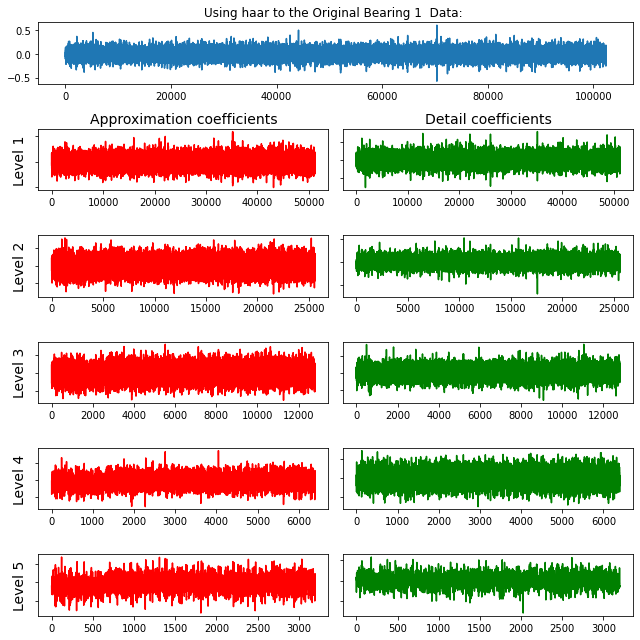

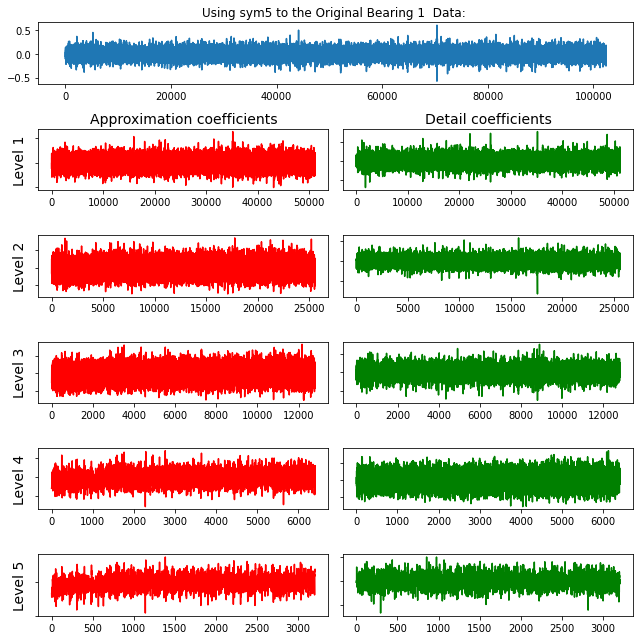

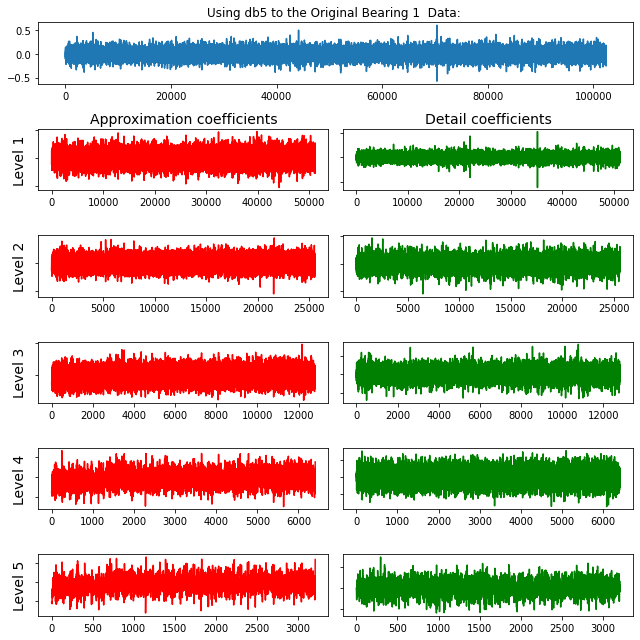

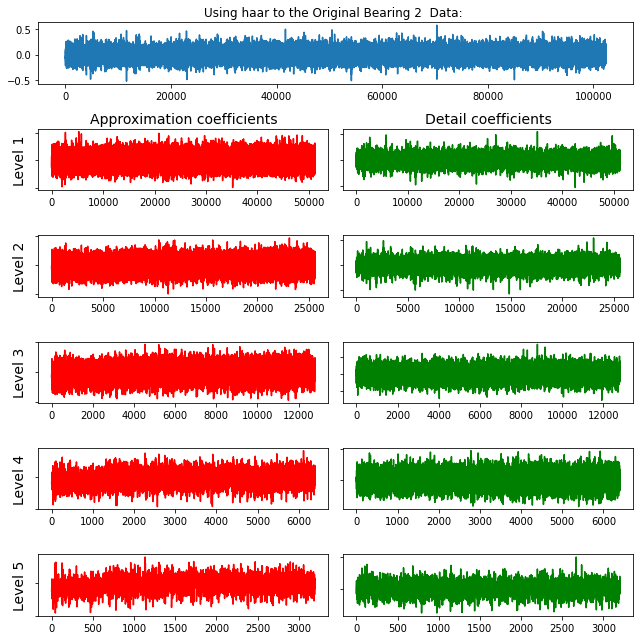

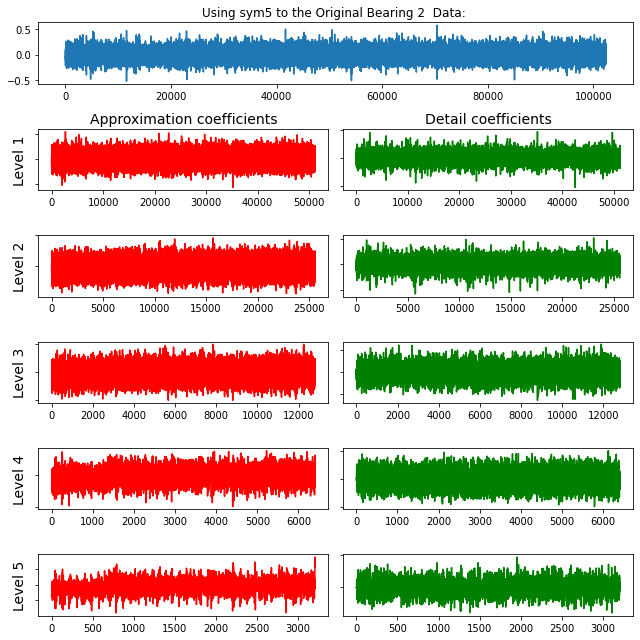

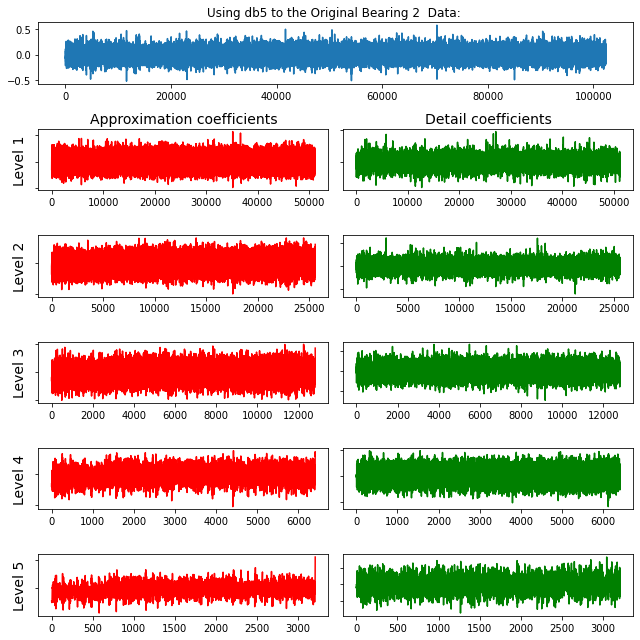

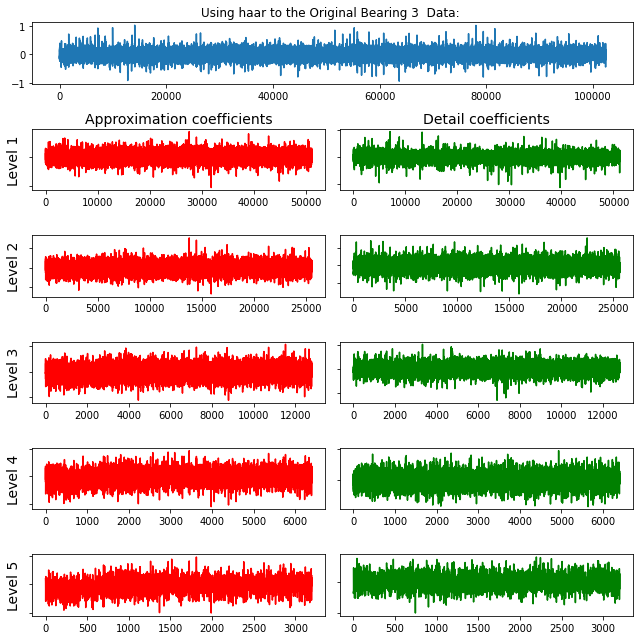

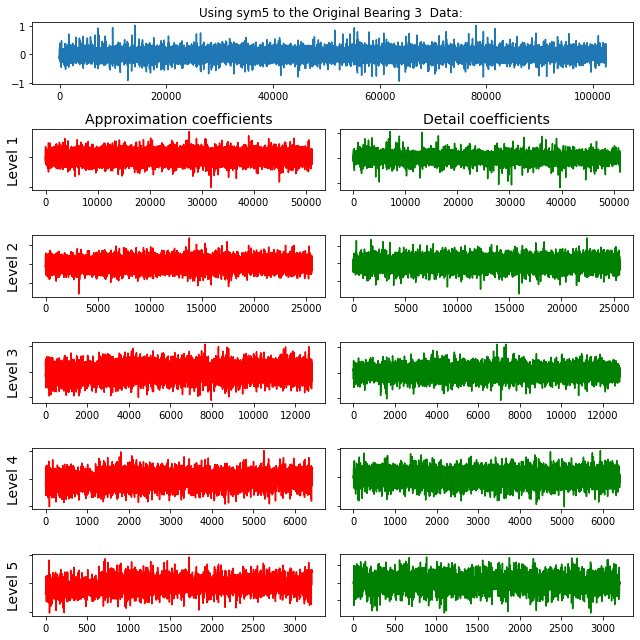

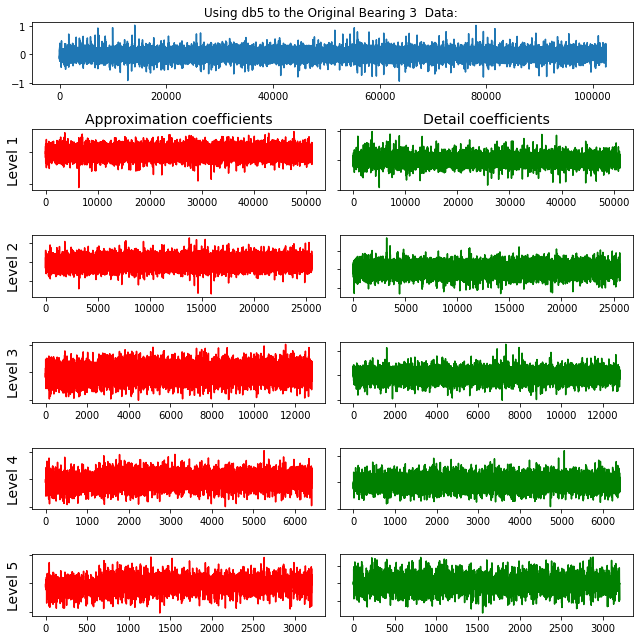

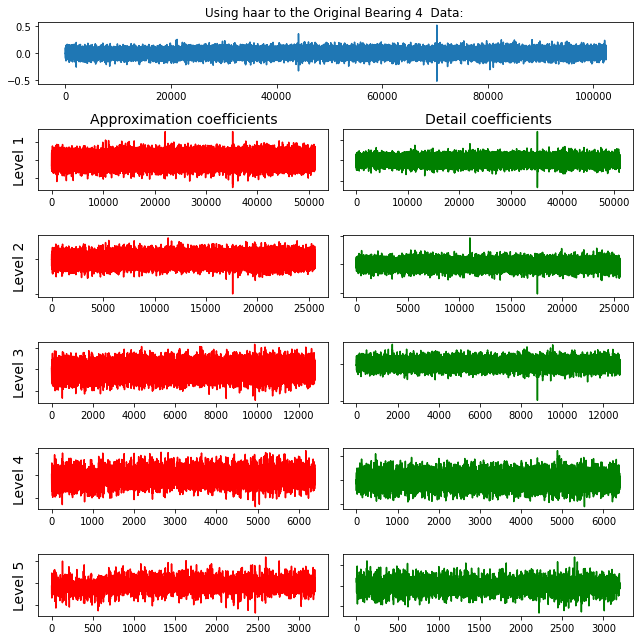

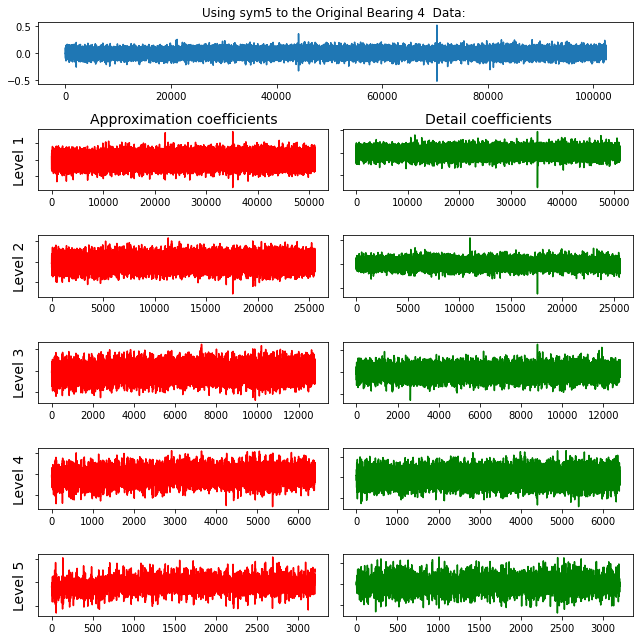

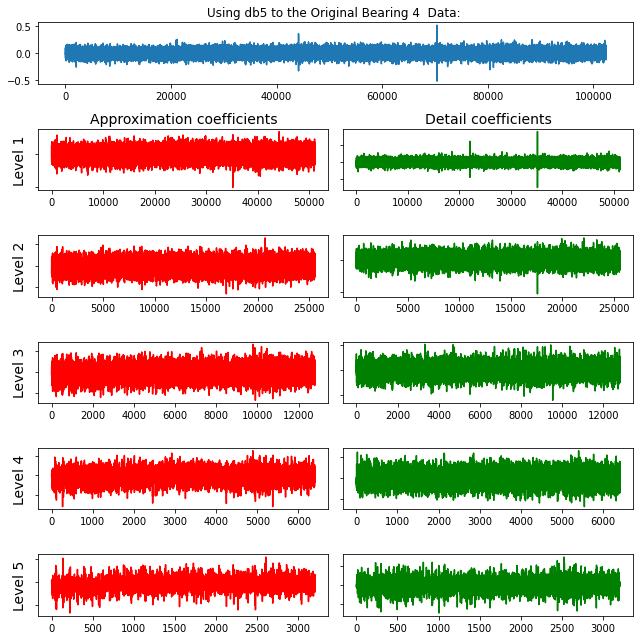

In [28]:
## hepsini loop'la 09.01.2023 21:41

bearingArrays = [bearing1, bearing2, bearing3, bearing4]
waveletNameArrays = ['haar', 'sym5', 'db5']
i=0
for bearingData in bearingArrays:
  i = i+1
  for waveletName in waveletNameArrays:
    waveletData = bearingData
    fig, axarr = plt.subplots(nrows=6, ncols=2, figsize=(9,9))
    gs = fig.add_gridspec(6,2)
    axarr[0,0].set_visible(False)
    axarr[0,1].set_visible(False)
    axarr[0,0] = fig.add_subplot(gs[0, :])
    axarr[0,0].plot(waveletData)
    axarr[0,0].set_title("Using " + str(waveletName) + " to the Original Bearing " + str(i) + "  Data: ")
    for ii in range(5):
        (waveletData, coeff_d) = pywt.dwt(waveletData, waveletName)
        axarr[ii+1, 0].plot(waveletData, 'r')
        axarr[ii+1, 1].plot(coeff_d, 'g')
        axarr[ii+1, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
        axarr[ii+1, 0].set_yticklabels([])
        if ii == 1:
            axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
            axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
        axarr[ii+1, 1].set_yticklabels([])
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/Bearing Dataset 2/bearing'+str(i)+'_'+ str(waveletName) +'.pdf', format = 'pdf', dpi=300)

In [ ]:
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Bearing Dataset 2/b1_db5.pdf', format = 'pdf', dpi=300)